In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


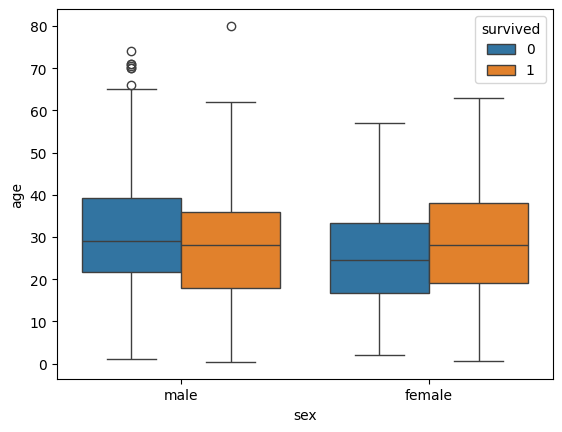

In [8]:
sns.boxplot(x='sex', y='age', hue='survived', data=titanic)
plt.show()

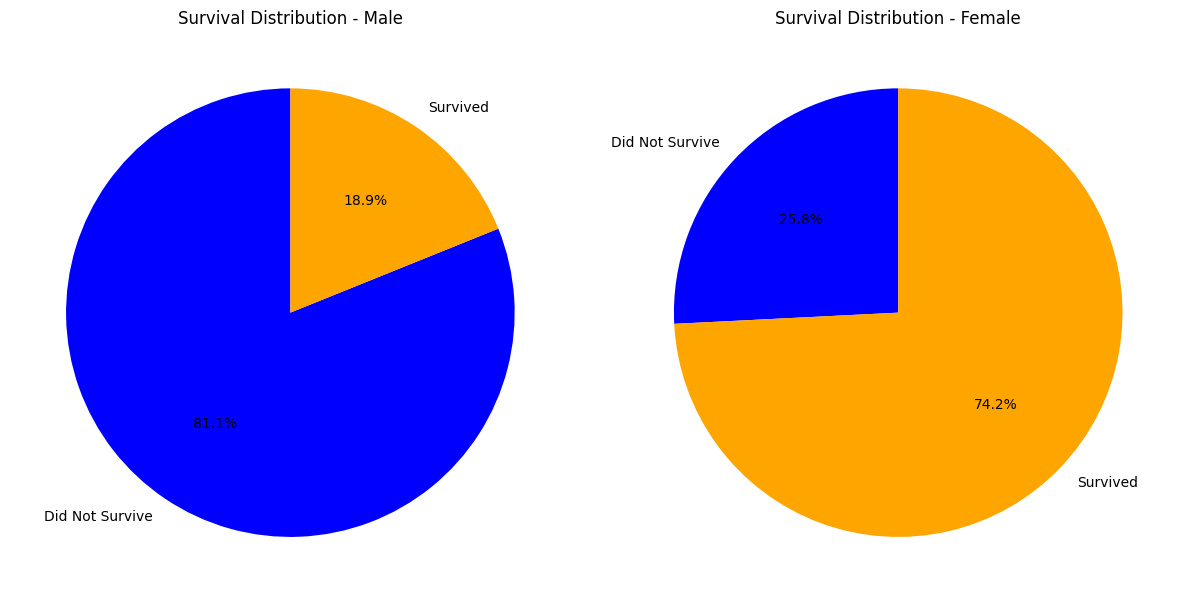

In [9]:
gender_survival = titanic.groupby(['sex', 'survived']).size().unstack()
labels = ['Did Not Survive', 'Survived']
colors = ['blue', 'orange']
fig, axes = plt.subplots(1, 2, figsize=(12,6))
for i, sex in enumerate(['male', 'female']):
    axes[i].pie(gender_survival.loc[sex], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90 )
    axes[i].set_title(f'Survival Distribution - {sex.capitalize()}')
plt.tight_layout()
plt.show()

Outliers:
      age   sex  survived
33   66.0  male         0
54   65.0  male         0
96   71.0  male         0
116  70.5  male         0
280  65.0  male         0
456  65.0  male         0
493  71.0  male         0
630  80.0  male         1
672  70.0  male         0
745  70.0  male         0
851  74.0  male         0


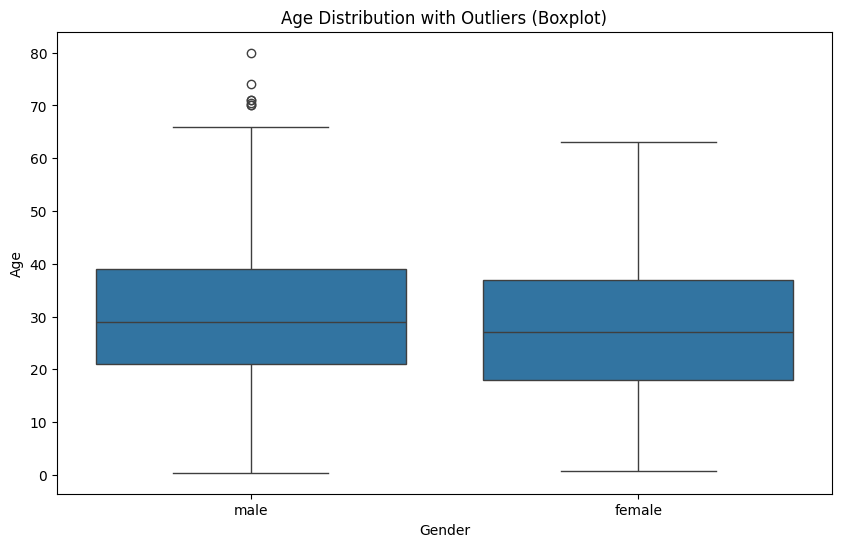

In [13]:
Q1 = titanic['age'].quantile(0.25)  # 25th percentile
Q3 = titanic['age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = titanic[(titanic['age'] < lower_bound) | (titanic['age'] > upper_bound)]
# Print out the outliers
print("Outliers:")
print(outliers[['age', 'sex', 'survived']])

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=titanic)

plt.title('Age Distribution with Outliers (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Age')

# Display the plot
plt.show()

In [ ]:
#Observation:

# The pie chart reprents the survival distribution of passangers in the titanic dataset.
#It shows that 18.9% of the male survived, while 81.3% did not survived.
#It shows that 74.2% of the female survived, while 25.8% did not survived.
#It shows that outliers are thier in male category, and thier are no outliers in female category.
#This indicates that majority of the passangers on the titanic did not make it.
#Highlighing the severity of the disaster.